In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [114]:
manip = ExperimentClass.Experiment("20240327_NPQ_lincomycin", "SpeedZen")

In [115]:
normalising_vector = []
for col in manip.Data.columns:
    normalising_vector.append(manip.Data[col][6])
manip.Data = manip.Data.div(normalising_vector, axis=1)

manip.annotations

,E,souche,conc_linc_mM,actinic_light,illumination,ilum_add_linc
0,11,stt7A,0,740,0,-1
1,12,stt7A,0,740,0,-1
2,13,stt7A,0,740,0,-1
3,14,stt7A,0,740,0,-1
4,21,stt7A,0,740,0,1
...,...,...,...,...,...,...
75,224,stt7A,1,740,3,3
76,231,stt7A,1,740,3,0
77,232,stt7A,1,740,3,0
78,233,stt7A,1,740,3,0


C:\Users\Orlando\AppData\Local\Temp\ipykernel_27416\2416895437.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


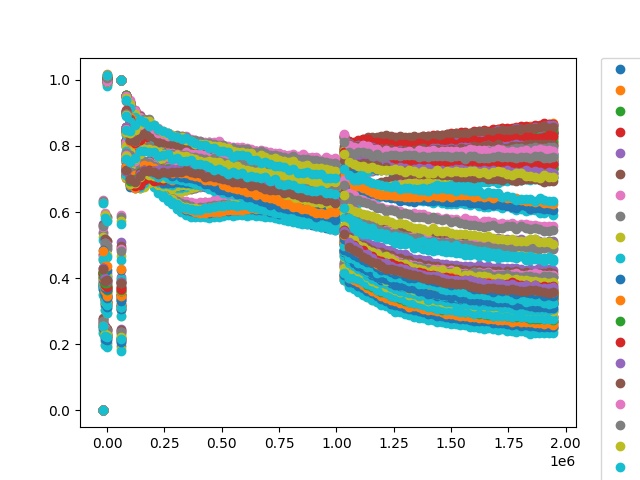

In [116]:
fig, ax = plt.subplots()
for i, col in enumerate(manip.Data.columns):
    ax.plot(manip.Time, manip.Data[col], 'o', label=col)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

In [117]:
def get_kinetics(time, data):
    time_Fstat = time[3::2]/(1000*60)
    Fstat = data[3::2]
    time_Fmax = time[4::2]/(1000*60)
    Fmax = data[4::2]
    return time_Fstat, Fstat, time_Fmax, Fmax


In [118]:
time_Fstat = []
time_Fmax = []
Fstat = []
Fmax = []
Phi_PSII = []
NPQ = []
for recor in manip.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip.Time, manip.Data[f"E{recor}"])
    time_Fstat.append(aux_time_Fstat)
    Fstat.append(aux_Fstat)
    time_Fmax.append(aux_time_Fmax)
    Fmax.append(aux_Fmax)
    Phi_PSII.append((Fmax[-1].values-Fstat[-1].values)/Fmax[-1].values)
    NPQ.append((Fmax[-1].values[0]-Fmax[-1].values)/Fmax[-1].values)


In [123]:
import matplotlib.pyplot as plt
souches = ["stt7A"]

import matplotlib.pyplot as plt

# Define input parameters
illumination_numbers = [3]  # List of illumination numbers to include in the plot
ilum_added_linc = [0, 1]  # List of experiment numbers to include

# Define filter conditions
experiment_condition = manip.annotations.experiment.isin(experiment_numbers)
illumination_condition = manip.annotations.illumination.isin(illumination_numbers)


# Combine filter conditions using logical AND (&) operator
filter_condition = experiment_condition & illumination_condition 

# Create a single figure outside the loop
fig, ax = plt.subplots(figsize=(10, 5))

for k, souche in zip(souches, souches):
    records = list(manip.annotations[(manip.annotations.souche == souche) & filter_condition].E.astype(int))
    experiment = manip.annotations[(manip.annotations.souche == souche) & experiment_condition].experiment.values[0]
    light = manip.annotations[(manip.annotations.souche == souche) & experiment_condition].actinic_light.values[0]
    ax.set_title(f"{k}, experiment = {experiment}, actinic light = {light} $µEm^{{-2}}s^{{-1}}$, illumination = {illumination_numbers}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], Fstat[index], '-', markersize=2, label=f'Exp {experiment}, Illumination {light}, {manip.annotations[manip.annotations.E == record].added_linc_uL.values[0]} µL linc.', color=f'C{j}')
        ax.plot(time_Fmax[index], Fmax[index], '-', markersize=2, color=f'C{j}')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluorescence (r. u.)")
fig.tight_layout()

# Save the figure only once
fig.savefig(manip.fig_folder + f"/{souches[0]}_exp_{experiment_numbers}_illumination_{illumination_numbers}.png", dpi=300)



AttributeError: 'DataFrame' object has no attribute 'experiment'

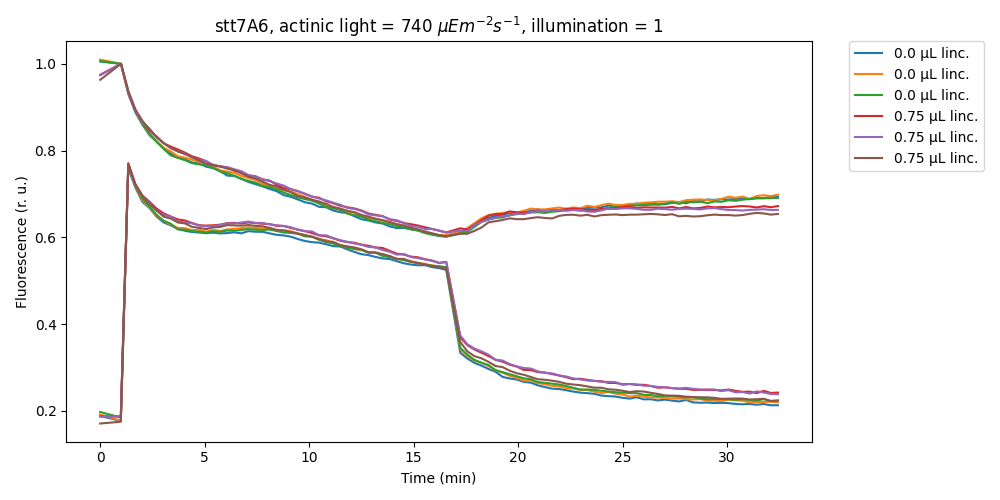

In [81]:
import matplotlib.pyplot as plt
souches = ["stt7A6"]
experiment = 0
illumination = 0
# Precompute filters
filter_condition = (manip.annotations.experiment == experiment) & (manip.annotations.illumination == illumination)

# Create a single figure outside the loop
fig, ax = plt.subplots(figsize=(10, 5))

for k, souche in zip(souches, souches):
    records = list(manip.annotations[(manip.annotations.souche == souche) & filter_condition].E.astype(int))
    light = manip.annotations[(manip.annotations.souche == souche) & (manip.annotations.experiment == experiment)].actinic_light.values[0]
    ax.set_title(f"{k}, actinic light = {light} $µEm^{{-2}}s^{{-1}}$, illumination = {illumination + 1}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], Fstat[index], '-', markersize=2, label=f'{manip.annotations[manip.annotations.E == record].added_linc_uL.values[0]} µL linc.', color=f'C{j}')
        ax.plot(time_Fmax[index], Fmax[index], '-', markersize=2, color=f'C{j}')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluorescence (r. u.)")
fig.tight_layout()

# Save the figure only once
fig.savefig(manip.fig_folder + f"/{souches[0]}_{light}µE_{illumination}_exp{experiment}.png", dpi=300)


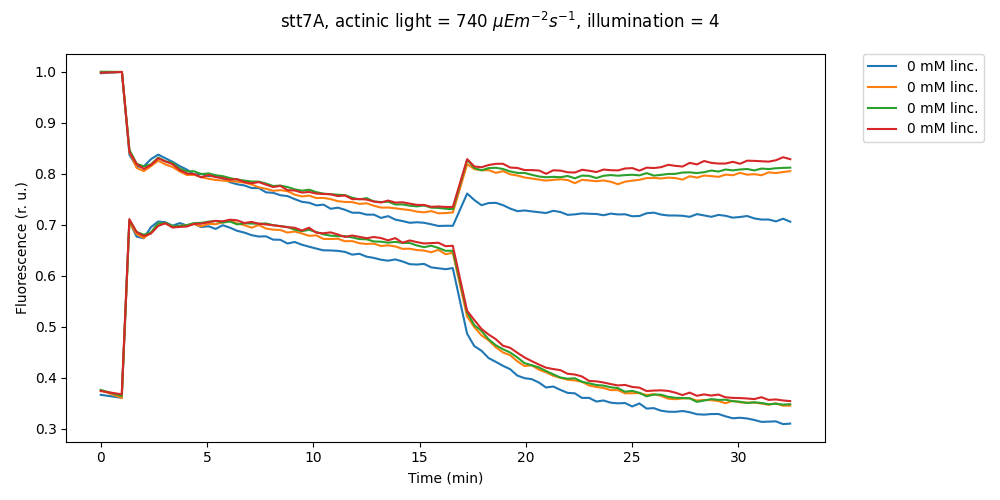

In [134]:
souches = ["stt7A"]
ilum_add_linc = -1
illumination = 3

for i, k in enumerate(souches):
    records = list(manip.annotations[(manip.annotations.souche == souches[i]) & (manip.annotations.ilum_add_linc == ilum_add_linc) & (manip.annotations.illumination == illumination)].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip.annotations[(manip.annotations.E == records[i])].actinic_light.values[0]
    fig.suptitle(f"{k}, actinic light = {light}" + " $µEm^{-2}s^{-1}$" + f", illumination = {illumination +1}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], Fstat[index], '-', markersize = 2, label = f'{manip.annotations[manip.annotations.E == record].conc_linc_mM.values[0]} mM linc.', color = f'C{j}')
        ax.plot(time_Fmax[index], Fmax[index], '-', markersize = 2, color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Fluorescence (r. u.)")
    fig.tight_layout()
    fig.savefig(manip.fig_folder + f"/{k}_{light}µE_{illumination}_exp{experiment}.png", dpi = 300)
    

In [111]:
test = manip.annotations.illumination.unique()
test

array([0, 1, 2, 3], dtype=int64)

In [141]:
manip.annotations.iloc[index].conc_linc_mM

0

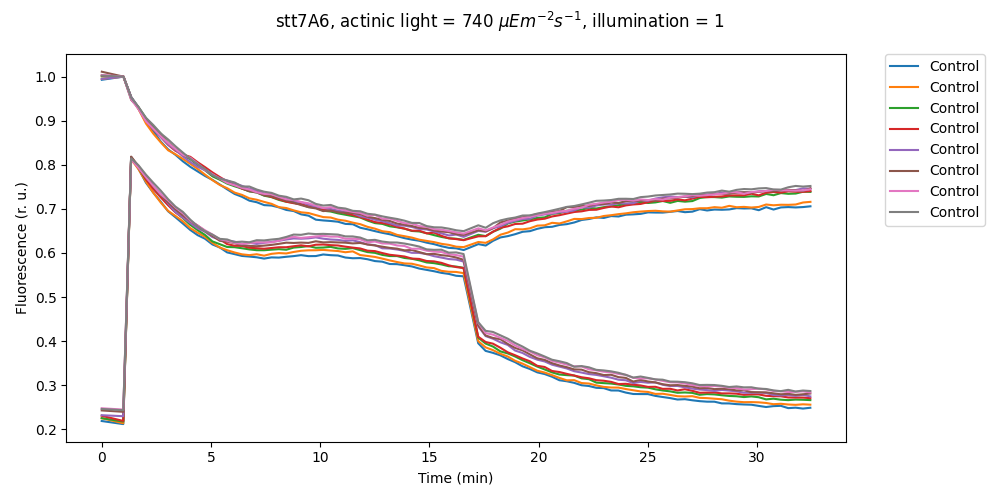

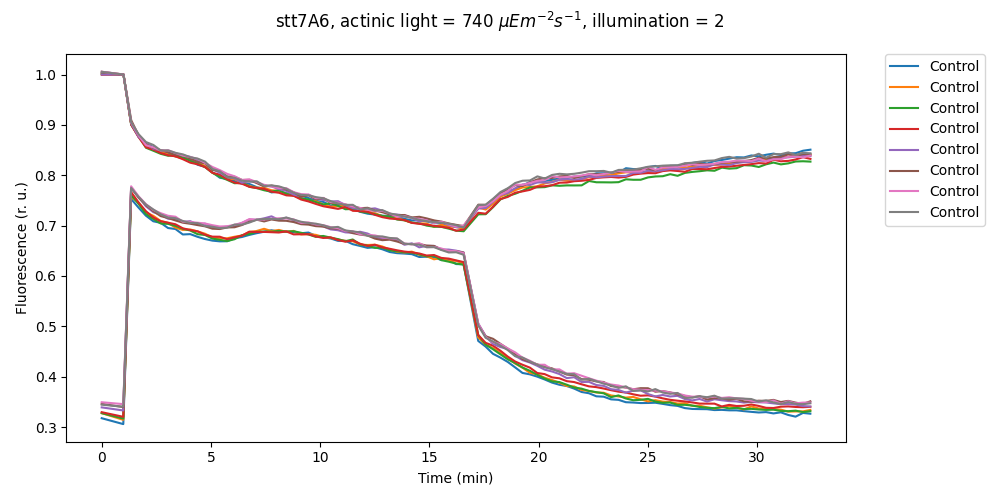

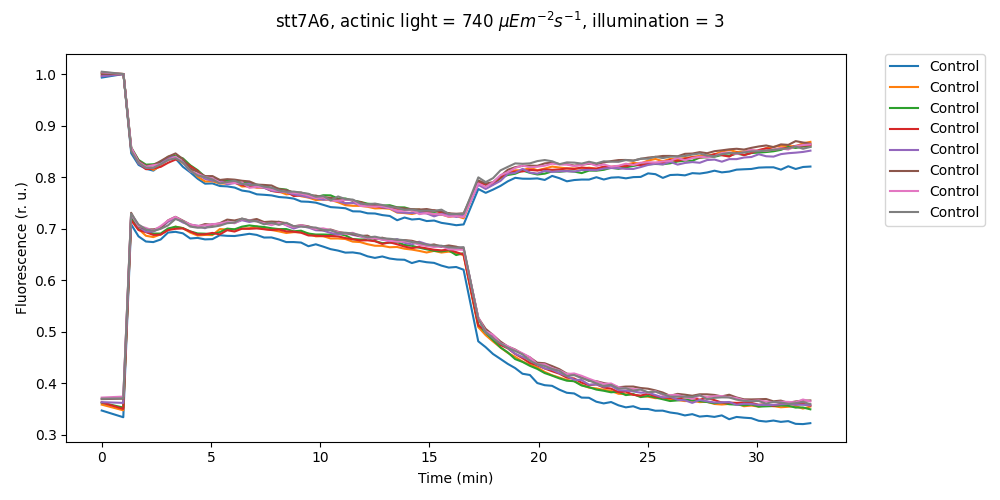

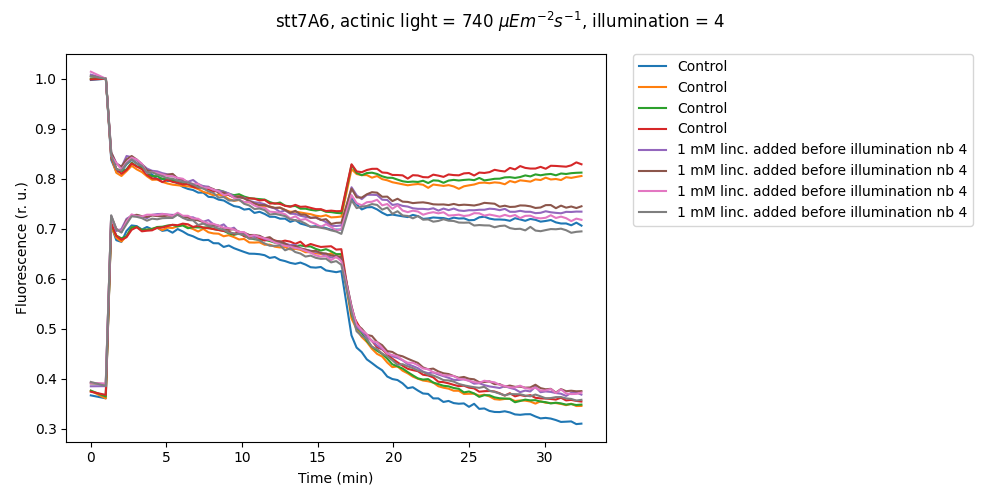

In [165]:
illuminations = manip.annotations.illumination.unique()
ilum_add_linc_list = [-1, 3]

lincomycin_condition = manip.annotations.ilum_add_linc.isin(ilum_add_linc_list)

for i, illumination in enumerate(illuminations):
    records = list(manip.annotations[(manip.annotations.illumination == illumination) & lincomycin_condition].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip.annotations[(manip.annotations.E == records[i])].actinic_light.values[0]
    fig.suptitle(f"stt7A6, actinic light = {light}" + " $µEm^{-2}s^{-1}$" + f", illumination = {illumination +1}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        if manip.annotations.iloc[index].ilum_add_linc == -1:
            label = "Control"
        elif manip.annotations.iloc[index].illumination < manip.annotations.iloc[index].ilum_add_linc:
            label = "Control"
        else:
            label = f'{manip.annotations.iloc[index].conc_linc_mM} mM linc. added before illumination nb {manip.annotations.iloc[index].ilum_add_linc + 1}'
        ax.plot(time_Fstat[index], Fstat[index], '-', markersize = 2, label = label, color = f'C{j}')
        ax.plot(time_Fmax[index], Fmax[index], '-', markersize = 2, color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Fluorescence (r. u.)")
    fig.tight_layout()
    fig.savefig(manip.fig_folder + f"/{k}_{light}µE_{illumination}.png", dpi = 300)
    

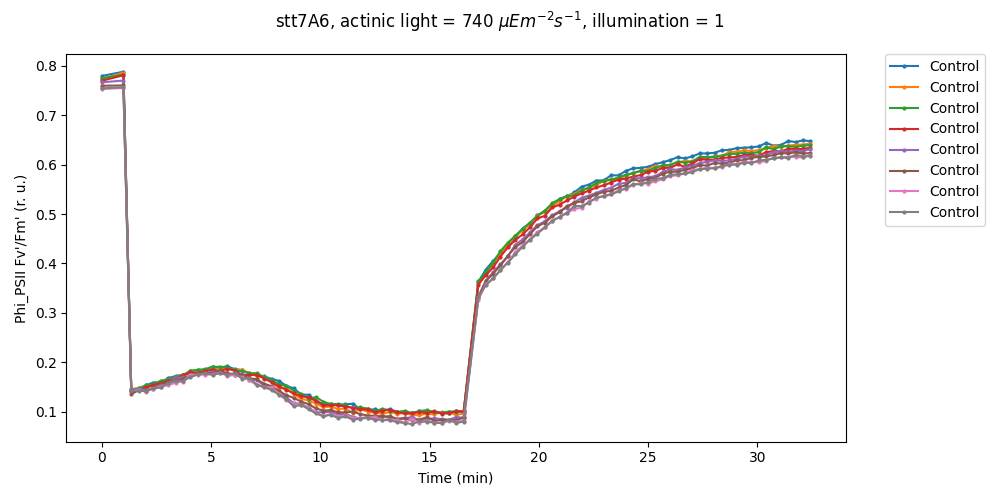

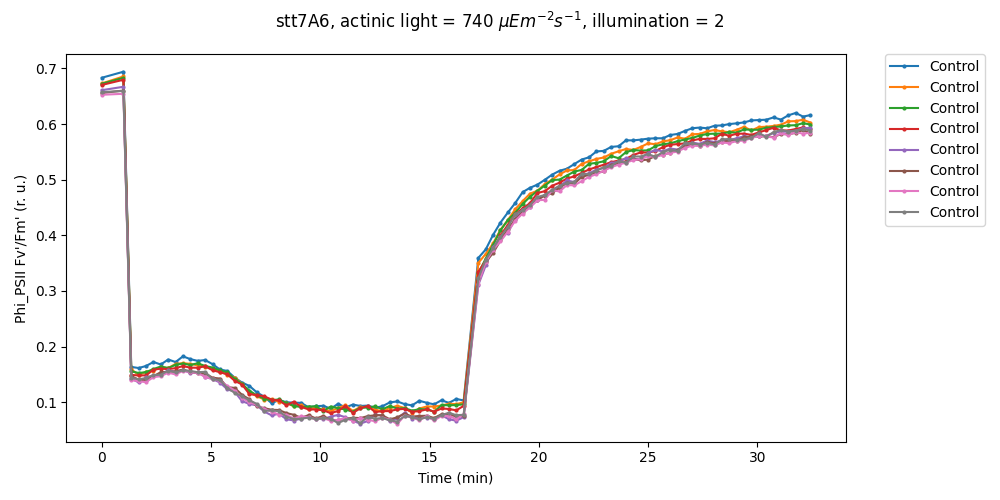

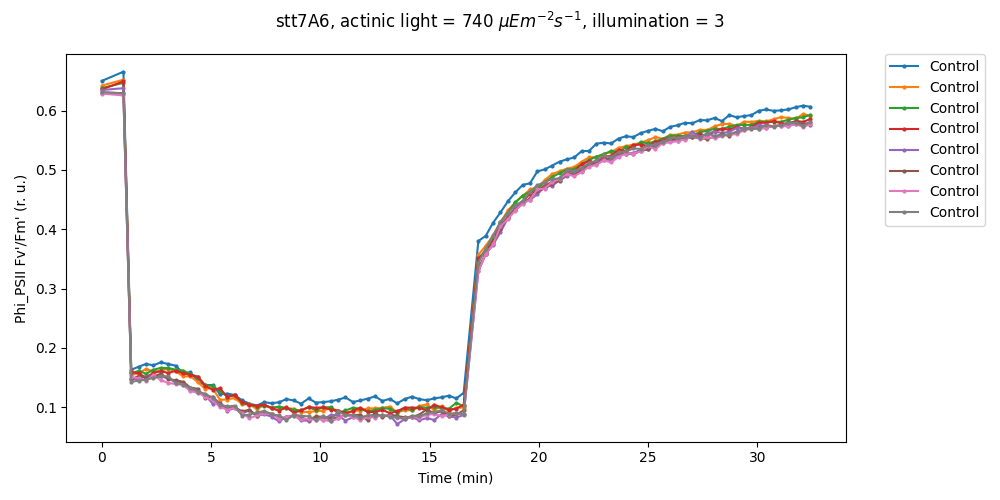

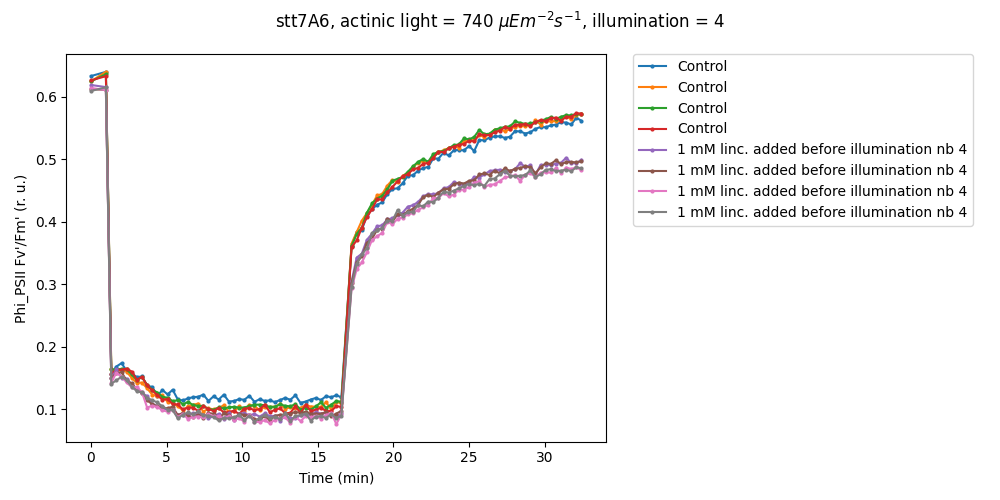

In [175]:
illuminations = manip.annotations.illumination.unique()
ilum_add_linc_list = [-1, 3]

lincomycin_condition = manip.annotations.ilum_add_linc.isin(ilum_add_linc_list)

for i, illumination in enumerate(illuminations):
    records = list(manip.annotations[(manip.annotations.illumination == illumination) & lincomycin_condition].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip.annotations[(manip.annotations.E == records[i])].actinic_light.values[0]
    fig.suptitle(f"stt7A6, actinic light = {light}" + " $µEm^{-2}s^{-1}$" + f", illumination = {illumination +1}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        if manip.annotations.iloc[index].ilum_add_linc == -1:
            label = "Control"
        elif manip.annotations.iloc[index].illumination < manip.annotations.iloc[index].ilum_add_linc:
            label = "Control"
        else:
            label = f'{manip.annotations.iloc[index].conc_linc_mM} mM linc. added before illumination nb {manip.annotations.iloc[index].ilum_add_linc + 1}'
        ax.plot(time_Fstat[index], Phi_PSII[index], 'o-', markersize = 2, label = label, color = f'C{j}')
 
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Phi_PSII Fv'/Fm' (r. u.)")
    fig.tight_layout()
    fig.savefig(manip.fig_folder + f"/Phi_PSII_{light}µE_{illumination}.png", dpi = 300)
    

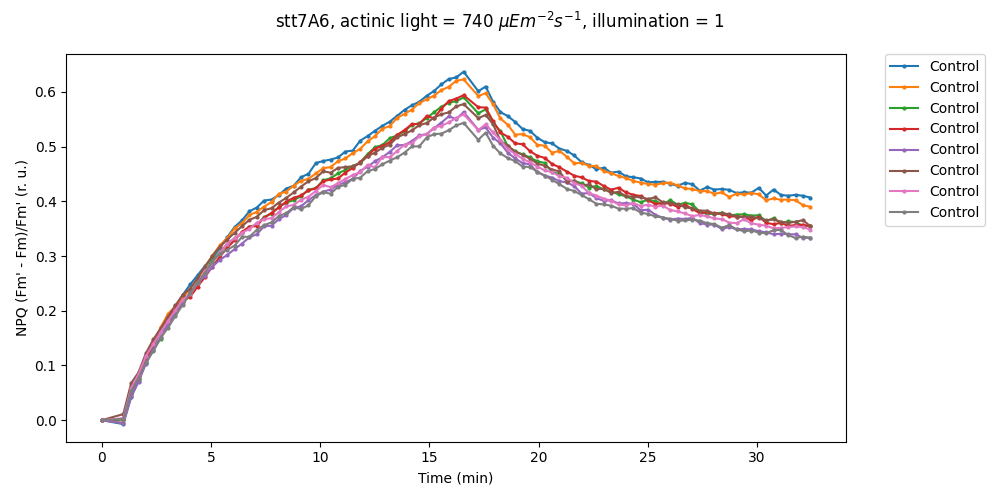

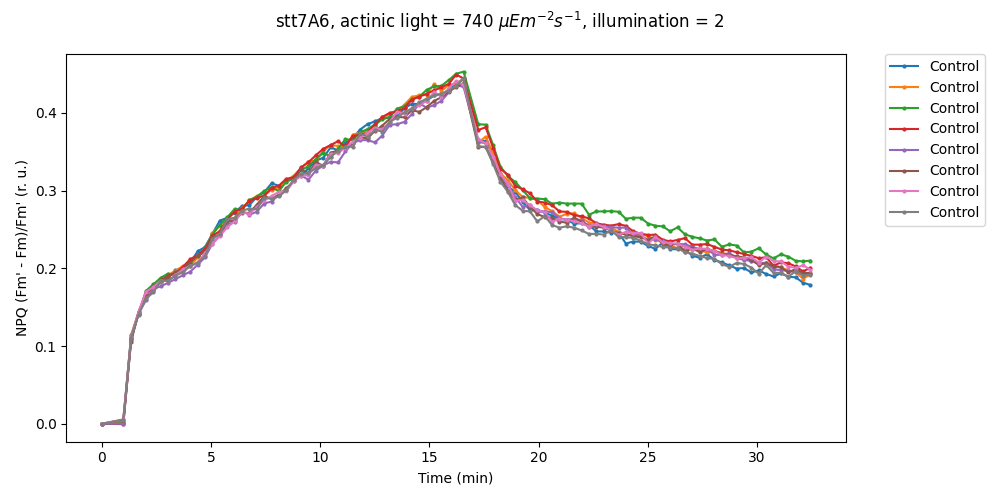

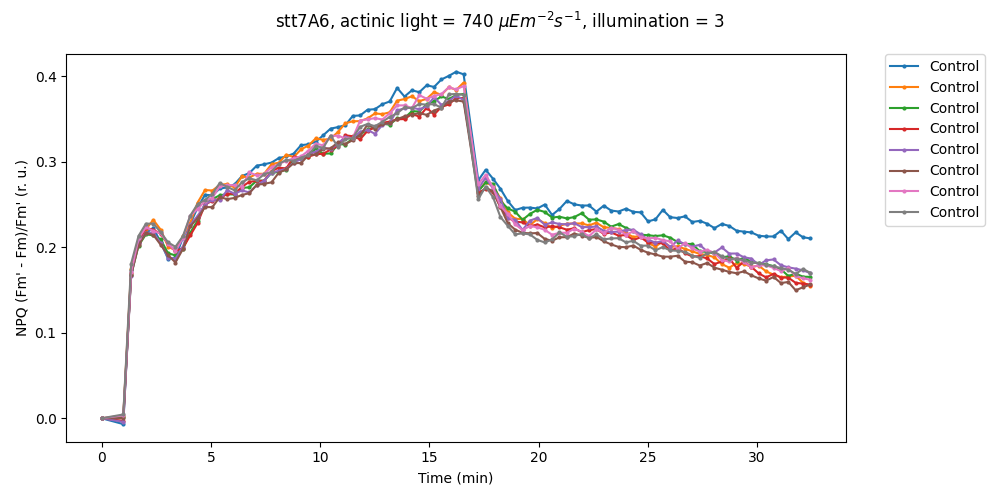

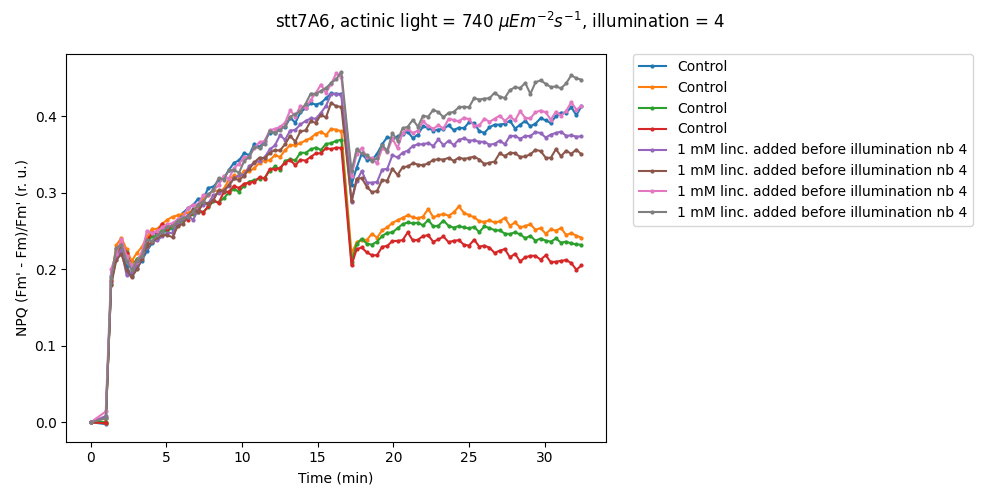

In [176]:
illuminations = manip.annotations.illumination.unique()
ilum_add_linc_list = [-1, 3]

lincomycin_condition = manip.annotations.ilum_add_linc.isin(ilum_add_linc_list)

for i, illumination in enumerate(illuminations):
    records = list(manip.annotations[(manip.annotations.illumination == illumination) & lincomycin_condition].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip.annotations[(manip.annotations.E == records[i])].actinic_light.values[0]
    fig.suptitle(f"stt7A6, actinic light = {light}" + " $µEm^{-2}s^{-1}$" + f", illumination = {illumination +1}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        if manip.annotations.iloc[index].ilum_add_linc == -1:
            label = "Control"
        elif manip.annotations.iloc[index].illumination < manip.annotations.iloc[index].ilum_add_linc:
            label = "Control"
        else:
            label = f'{manip.annotations.iloc[index].conc_linc_mM} mM linc. added before illumination nb {manip.annotations.iloc[index].ilum_add_linc + 1}'
        ax.plot(time_Fstat[index], NPQ[index], 'o-', markersize = 2, label = label, color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("NPQ (Fm' - Fm)/Fm' (r. u.)")
    fig.tight_layout()
    fig.savefig(manip.fig_folder + f"/{k}_{light}µE_{illumination}.png", dpi = 300)
    

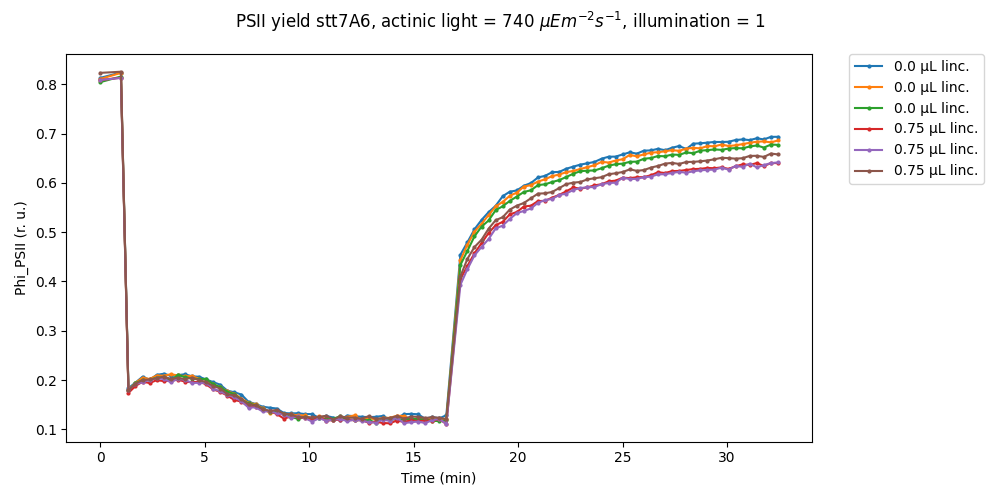

In [75]:
souches = ["stt7A6"]
experiment = 0
illumination = 0

for i, k in enumerate(souches):
    records = list(manip.annotations[(manip.annotations.souche == souches[i]) & (manip.annotations.experiment == experiment) & (manip.annotations.illumination == illumination)].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip.annotations[(manip.annotations.souche == souches[i]) & (manip.annotations.experiment == experiment)].actinic_light.values[0]
    fig.suptitle(f"PSII yield {k}, actinic light = {light}" + " $µEm^{-2}s^{-1}$" + f", illumination = {illumination +1}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], Phi_PSII[index], 'o-', markersize = 2, label = f'{manip.annotations[manip.annotations.E == record].added_linc_uL.values[0]} µL linc.', color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Phi_PSII (r. u.)")
    fig.tight_layout()
    fig.savefig(manip.fig_folder + f"/phi_PSII_{k}_{light}µE_{illumination}.png", dpi = 300)

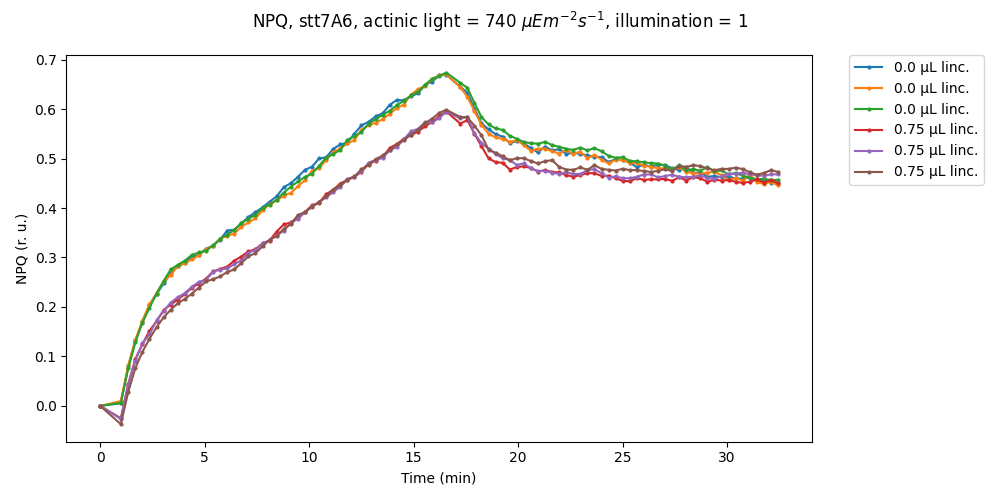

In [76]:
souches = ["stt7A6"]
experiment = 0
illumination = 0

for i, k in enumerate(souches):
    records = list(manip.annotations[(manip.annotations.souche == souches[i]) & (manip.annotations.experiment == experiment) & (manip.annotations.illumination == illumination)].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip.annotations[(manip.annotations.souche == souches[i]) & (manip.annotations.experiment == experiment)].actinic_light.values[0]
    fig.suptitle(f"NPQ, {k}, actinic light = {light}" + " $µEm^{-2}s^{-1}$"+ f", illumination = {illumination +1}")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], NPQ[index], 'o-', markersize = 2, label = f'{manip.annotations[manip.annotations.E == record].added_linc_uL.values[0]} µL linc.', color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("NPQ (r. u.)")
    fig.tight_layout()
    fig.savefig(manip.fig_folder + f"/NPQ_{k}_{light}µE_{illumination}.png", dpi = 300)